# Problem 2 [Counting]
> Each exponential random sample represents **the waiting time** until an event occurs. **Implement a routine to count the number of events that occur in 1 unit of time.** Generate such counts for 1000 separate unit time intervals. How are these counts distributed? Justify your answer   
  

We generate the exponential random variable with $\lambda = 0.2 $, and we test the unit interval for 1000 times. 

<IPython.core.display.Javascript object>


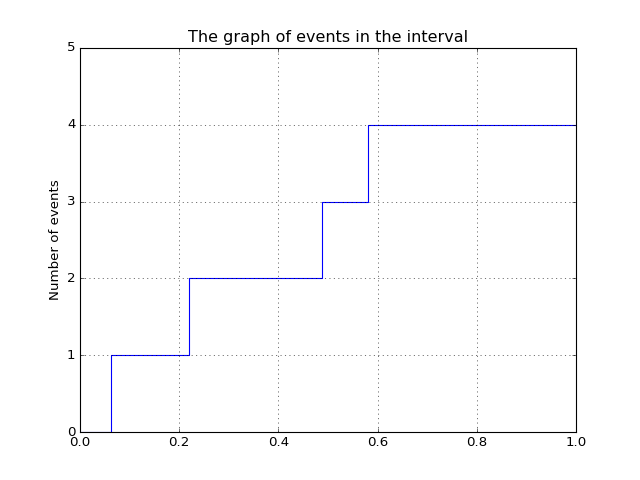

Totally, there are 4 events happened.


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# The default lambda is 1.
def my_expon_unit():
    t = np.random.exponential(0.2);
    te = np.array([]);
    while t < 1:
        te = np.append(te,[t])
        t = t + np.random.exponential(0.2)
    return te

# Using the above funtion to simulate unit time interval.
te = my_expon_unit()

# Plot the graph to show the events.
n = np.arange(0,np.size(te)+1,1)
n = np.append([0],n)
te = np.append([0],te)
te = np.append(te, 1)
plt.plot(te,n,drawstyle='steps')
plt.xlim([0,1])
plt.ylim([0,max(n)+1])
plt.grid()
plt.title('The graph of events in the interval')
plt.ylabel('Number of events')
plt.show()
print('Totally, there are '+ str(max(n))+' events happened.')

Next, we run the routine for 1,000 times to find out whether the number of events happened in the interval is belong to a specific distribution.

<IPython.core.display.Javascript object>


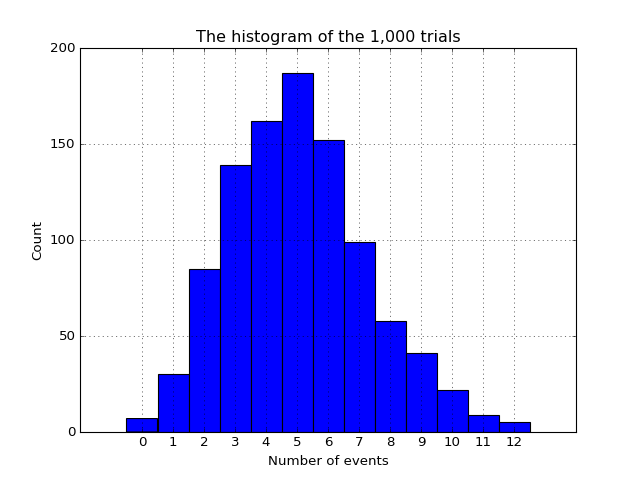

In [2]:
# Run the simulation for 1,000 times.
mysample=[]
for i in range(1000):
    mysample.append(np.size(my_expon_unit()))

# Plot the histogram.
plt.figure()
on,obins,opatches = plt.hist(mysample,bins=np.arange(min(mysample)-0.5,max(mysample)+0.5,1))
plt.title('The histogram of the 1,000 trials')
plt.ylabel('Count')
plt.xlabel('Number of events')
plt.xticks(np.arange(min(mysample),max(mysample),1))
plt.grid()
plt.show()

The above figure shows a distribution like the Possion distribution. Recall the Poisson distribution,
$$
f_X(x)=\frac{\lambda ^ke^{-\lambda}}{k!}
$$
The $\lambda $ is the expectation of the number of events that will happen.  
In this case,  $\lambda = 5$.

<IPython.core.display.Javascript object>


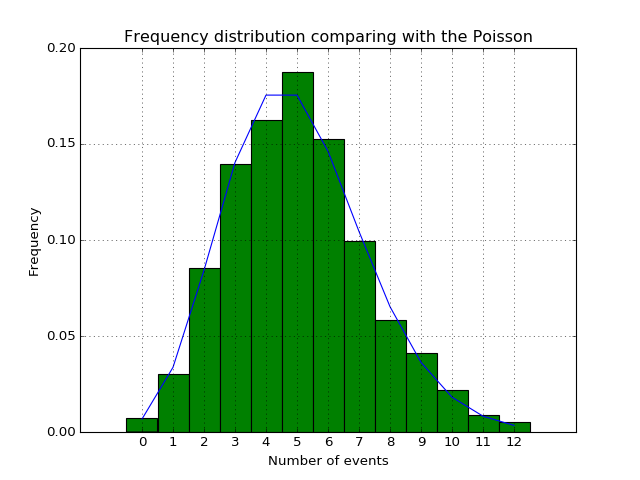

In [3]:
# Generate the graph of poisson distribution for this case.
from scipy.stats import poisson
nbinspmf = np.fix(obins-0.5)
nbinspmf = np.delete(nbinspmf,0)
pmf = poisson.pmf(nbinspmf,5)

# Plot the Poisson pmf with our experiment to see the fitness.
plt.figure()
plt.plot(nbinspmf,pmf)
plt.hist(mysample,bins=obins, normed = 1)
plt.title('Frequency distribution comparing with the Poisson')
plt.ylabel('Frequency')
plt.xlabel('Number of events')
plt.grid()
plt.xticks(np.arange(min(mysample),max(mysample),1))
plt.show()

From the above figure, the Possion distribution seems fit it well. So let's do a Chi-square test of it to see the goodness of fit.

In [4]:
# Using Chi-square goodness of fit test to evaluate our observation.
from scipy.stats import chisquare
print('The observed data '+ str(on))

# Generate the expected data from Poisson pmf.
en = pmf * 1000
print('The expected data ' + np.array_str(en, precision = 1))

# Combine the group with sample count smaller than 5 into the smallest group with count > 5.
com_index = np.logical_or(on < 5,en < 5)
into_index = on[com_index == False].argmin()
new_on = on[com_index==False]
new_en = en[com_index==False]
new_on[into_index] += sum(on[com_index])
new_en[into_index] += sum(en[com_index])

# The  chisquare test.
print(chisquare(new_on,new_en))

The observed data [   7.   30.   85.  139.  162.  187.  152.   99.   58.   41.   22.    9.
    5.]
The expected data [   6.7   33.7   84.2  140.4  175.5  175.5  146.2  104.4   65.3   36.3
   18.1    8.2    3.4]
Power_divergenceResult(statistic=5.3808226586780821, pvalue=0.91133122168390224)


As we can see, the pvalue is greater than the significant level that we often use $\alpha = 0.05$. Thus, it means Possion distribution fits it well.